# Linear Regression Assignment

# Boom Bikes - Bike share rental platform

**Problem statement** 

To comprehend the aspects influencing demand for shared bikes in the American market, and for this company to be aware of the major variables that predict demand for shared bikes.

**Business goals**

Develop a business model to demonstrate the demand for shared bikes using all available independent factors and to comprehend the dynamics of demand in a new market.

# Points to be followed


*   Understand the dataset 
*   Data cleaning and Build model
*   Train the model with train data
*   Residual analysis
*   Prediction and evaluating the model with test data







# Reading the data

In [240]:
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [241]:
# import libraries required for reading, visulaization, model building and prediction
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

In [242]:
#For reading the data in google drive to google colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [243]:
#Reading the csv file from google drive for Exploratory data analysis
bike_data=pd.read_csv('/content/drive/MyDrive/day.csv')
#To check top 5 rows of dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Understanding the data

In [244]:
bike_data.shape

(730, 16)

In [245]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [246]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [247]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Checking the variables and dropping unwanted variables from dataset
*   Instant - Index variale.
*   dteday - Seperate Columns for year ,month and weekday are present.
*   Casual and Registered - Target variable 'cnt' is sum of casual and registered.



In [248]:
# Deleting unwanted variables from data set.
bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [249]:
bike_data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [250]:
#converting numerical variables to categorical variables
bike_data.season = bike_data.season.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [251]:
bike_data.weekday = bike_data.weekday.map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday' })

In [252]:
bike_data.mnth = bike_data.mnth.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [253]:
bike_data.weathersit = bike_data.weathersit.map({1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'})

In [254]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [255]:
bike_data.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

# Visualising the data

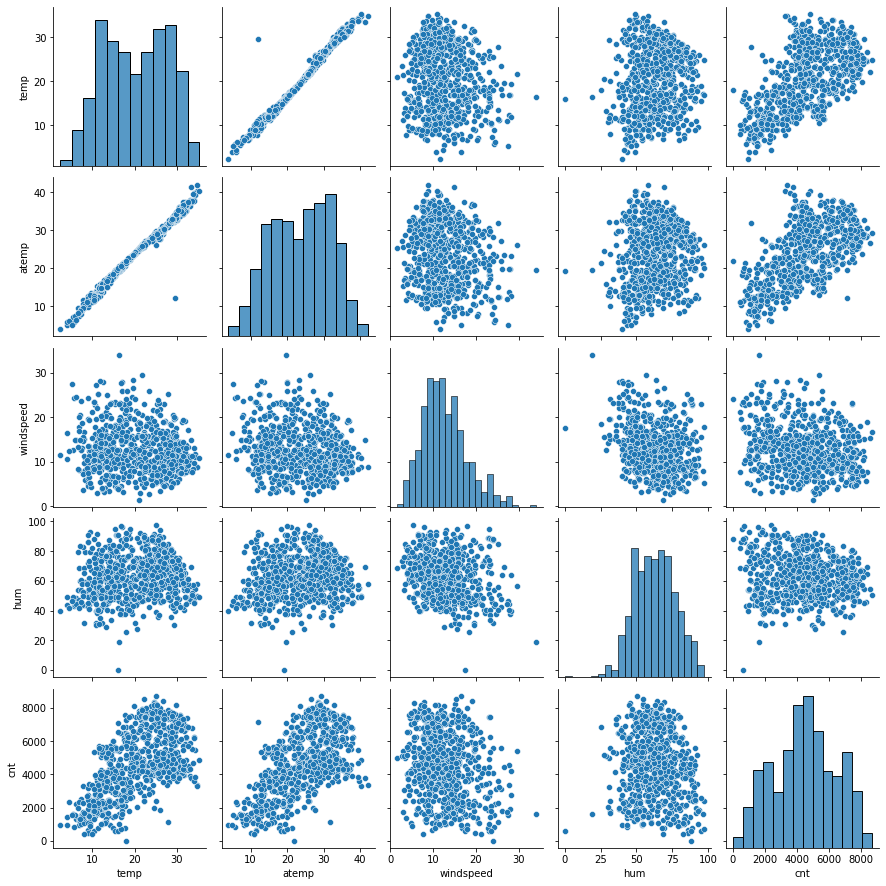

In [256]:
# Pair plots for all the numeric variables in Boombike_data
sns.pairplot(data=bike_data, vars = ['temp', 'atemp', 'windspeed','hum','cnt'])
plt.show()

**Observations from Pair - Plots:**

*   The dependent variable 'cnt' has a positive linear connection with the predictor variables 'temp' and 'atemp', as seen in the above pair plot.
*   There is no linear association between the predictor variables 'hum' and 'windspeed' and the dependent variable 'cnt'.



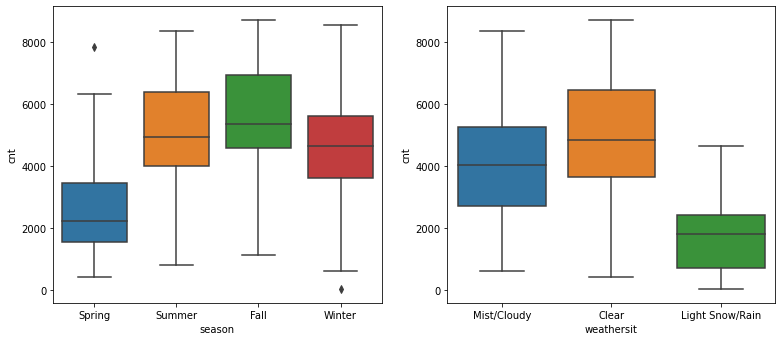

In [257]:
# Box plots for the categorical variables in Boombike_data
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

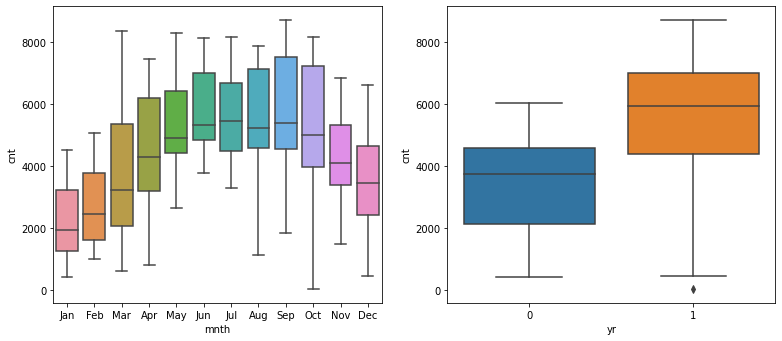

In [258]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.show()

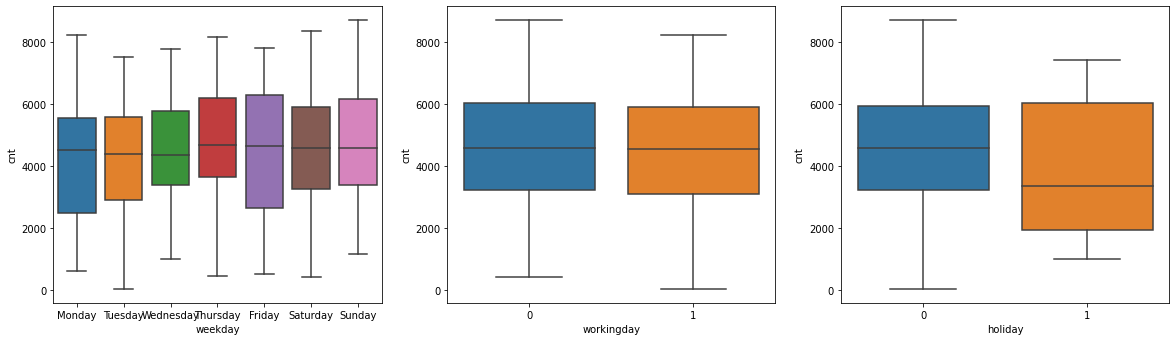

In [259]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.show()

**Observations from Box -plots:**
*   In the aforementioned visualisations of numerical and categorical columns, there are no outliers.
*   For the fourth condition (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog), the Weathersit boxplot has 0 cnt values.
*   The Season and Months box plot shows that cnt values increase during the summer months of 4,5,6 months and gradually drop during the winter months of 10,11,12 months.
*   It can be seen from the working day box plot that cnt values are lower on weekends and holidays than on weekdays.
*   The yr boxplot shows that cnt values are significantly higher in 2019 than they were in 2018.








In [260]:
# Bivariate Analysis for Categorical and Numerical Variable
def bivariate_cat_num(df, x_var, y_var, hue_col):
    
    plt.figure(figsize = (8,6))
    sns.barplot(data = df, x = x_var, y = y_var, hue = hue_col)
    plt.ylabel('Count', color = 'g', labelpad = 15, fontsize = 16)
    plt.xlabel(x_var, color = 'g', labelpad = 10, fontsize = 16)
    if x_var == 'yr':
        plt.xticks([0,1],['2018','2019'])
    if x_var == 'holiday':
        plt.xticks([0,1],['No Holiday','Holiday'])
    if x_var == 'workingday':
        plt.xticks([0,1],['weekend/holiday','workingday'])
        
    plt.title('Variation of Count with '+ x_var, pad = 25, color = 'g', fontsize = 20)
    plt.show()

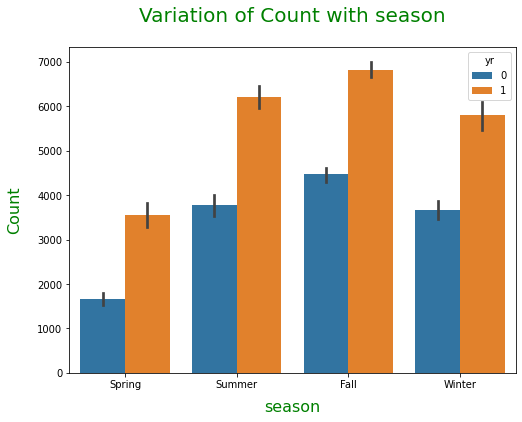

In [261]:
bivariate_cat_num(bike_data, 'season', 'cnt', 'yr')

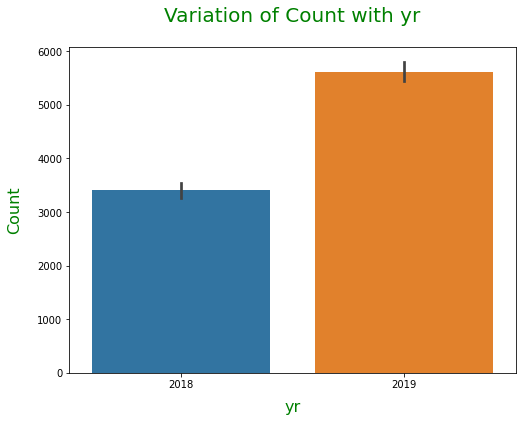

In [262]:
bivariate_cat_num(bike_data, 'yr', 'cnt', None)

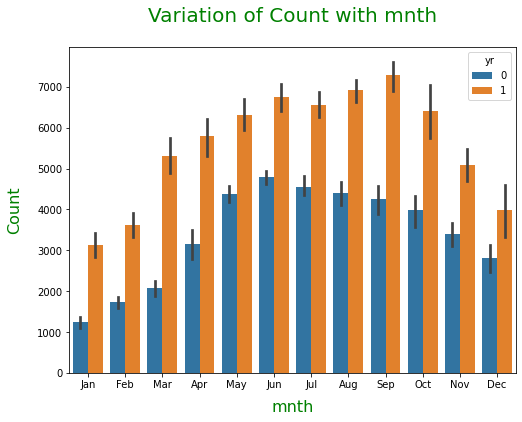

In [263]:
bivariate_cat_num(bike_data, 'mnth', 'cnt', 'yr')

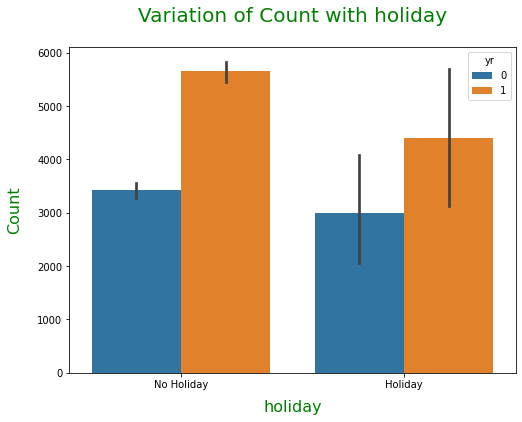

In [264]:
bivariate_cat_num(bike_data, 'holiday', 'cnt', 'yr')

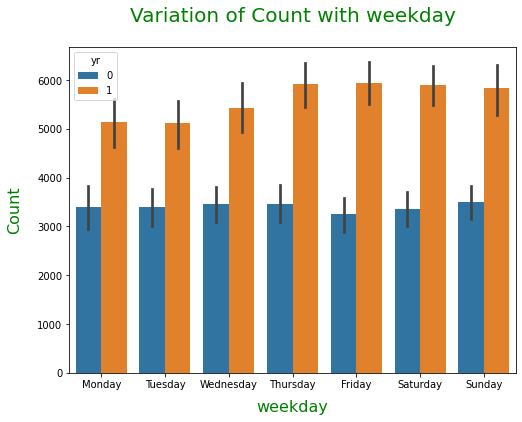

In [265]:
bivariate_cat_num(bike_data, 'weekday', 'cnt', 'yr')

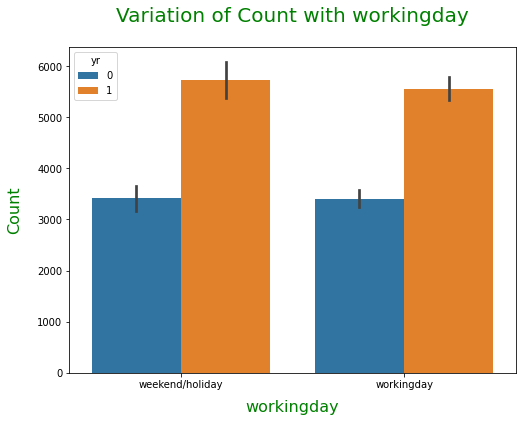

In [266]:
bivariate_cat_num(bike_data, 'workingday', 'cnt', 'yr')

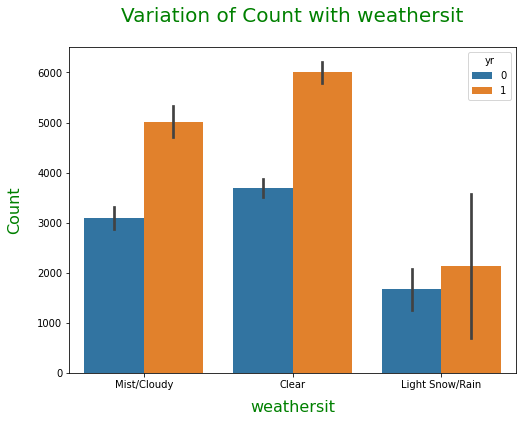

In [267]:
bivariate_cat_num(bike_data, 'weathersit', 'cnt', 'yr')

**Observations from barplots:**
*   We can observe from the above bar plot that the bike rental count is **high** in the **fall** season for both **2018** and **2019**.
*   When comparing the two years, **2019** has a higher rental count, i.e.,'more than 6500 (approx.)', as opposed to **2018**, which has a count of'more than 4000 (approx.)' in **fall**.
*   In both 2018 and 2019, the number of bike rentals is **low** in the spring.
*   The above bar plot clearly shows that the year **2019** has more bike rentals than the year **2018**.
*   Whereas the rental count in **2018** was 'approximately 3500 (approx. ),' the rental count in **2019** is 'increases more than 5500 (approx.)'.
*   We can observe from the above bar plot that the rental count is **high** in the month of **September** for the year **2019**.
*   In contrast, the rental count for the year **2018** is **high** in the month of **June**.
*   In contrast, demand for bike rentals is **low** in both the year **2018** and **2019** for the month of **January**.
*   The above barplot shows that when there is no holiday in both the year **2018** and **2019**, the bike rental count is **high**.
*   According to the above barplot, bike rental demand is **high** on **Thursday**, **Friday**, and **Saturday** in the year **2019** when compared to other weekdays.
*   In the year **2018**, bike rental demand is **high** on **Monday**, **Tuesday**, **Wednesday**, and **Thursday**.
*   As seen in the above barplot, bike rental demand is **high** in **clear weather** in both the years **2018** and **2019**.
*   On the other hand, demand drops in **Light Snow** conditions throughout the year.




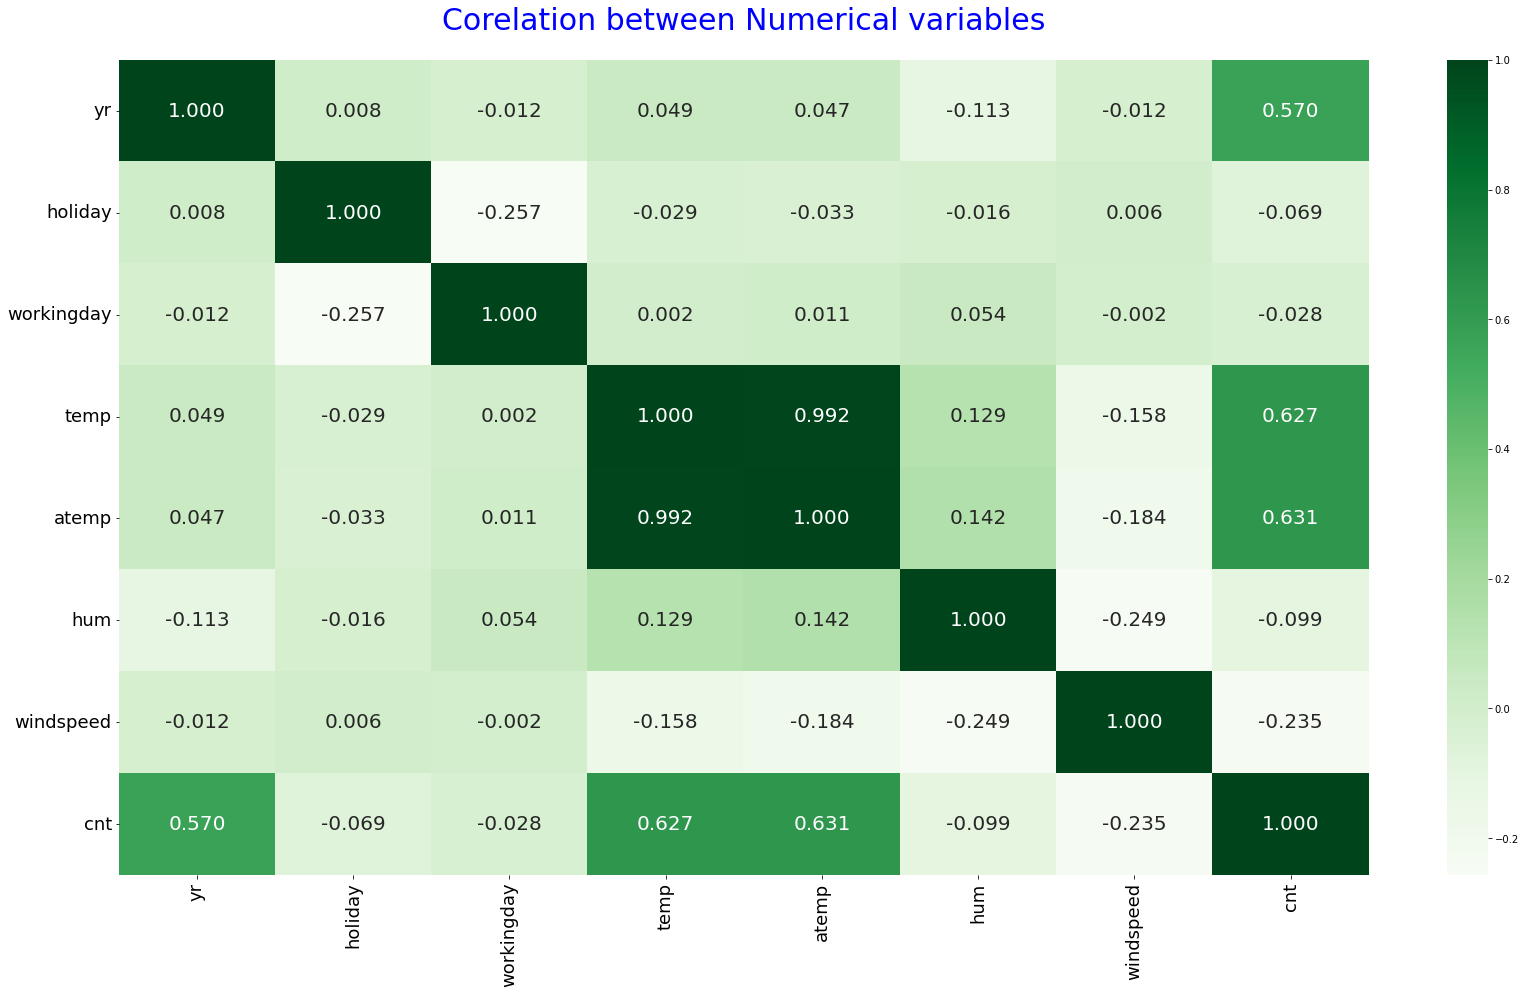

In [268]:
# co-relation between numerical variables through Heat map
plt.figure(figsize = (28,15))
sns.heatmap(bike_data.corr(), annot = True, cmap = 'Greens', fmt = '.3f',annot_kws={"fontsize":20})
plt.title('Corelation between Numerical variables', pad = 30, color = 'b', fontsize = 30)
plt.xticks(fontsize = 18,rotation=90)
plt.yticks(fontsize = 18,rotation=0)
plt.show()

**Observations from Heat- map:**

*   With a co-relation co-efficient of 0.992, 'temp' and 'atemp' are substantially positively connected.
*   Because the current data set shows multi collinearity with both predictor variables 'temp' and 'atemp,' we must delete one of the predictor variables from both (i.e., I will be droping atemp varibale from data set).



In [269]:
# Drop 'atemp' varibale from dataset.
bike_data.drop('atemp', axis = 1, inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist/Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist/Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


# Data preparation for modelling

In [270]:
# create dummy variables for categorical set
dummies_season = pd.get_dummies(bike_data['season'], drop_first = True)
dummies_month = pd.get_dummies(bike_data['mnth'], drop_first = True)
dummies_weekday = pd.get_dummies(bike_data['weekday'], drop_first = True)
dummies_weathersit = pd.get_dummies(bike_data['weathersit'], drop_first = True)

In [271]:
bike_data = pd.concat([bike_data, dummies_season, dummies_month, dummies_weekday, dummies_weathersit], axis = 1)

In [272]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist/Cloudy
0,Spring,0,Jan,0,Monday,1,Mist/Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tuesday,1,Mist/Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [273]:
# drop original variables set from Dummy columns
dummy_var = ['season', 'mnth', 'weekday', 'weathersit']
bike_data.drop(dummy_var, axis = 1, inplace = True)

In [274]:
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist/Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
bike_data.shape

(730, 29)

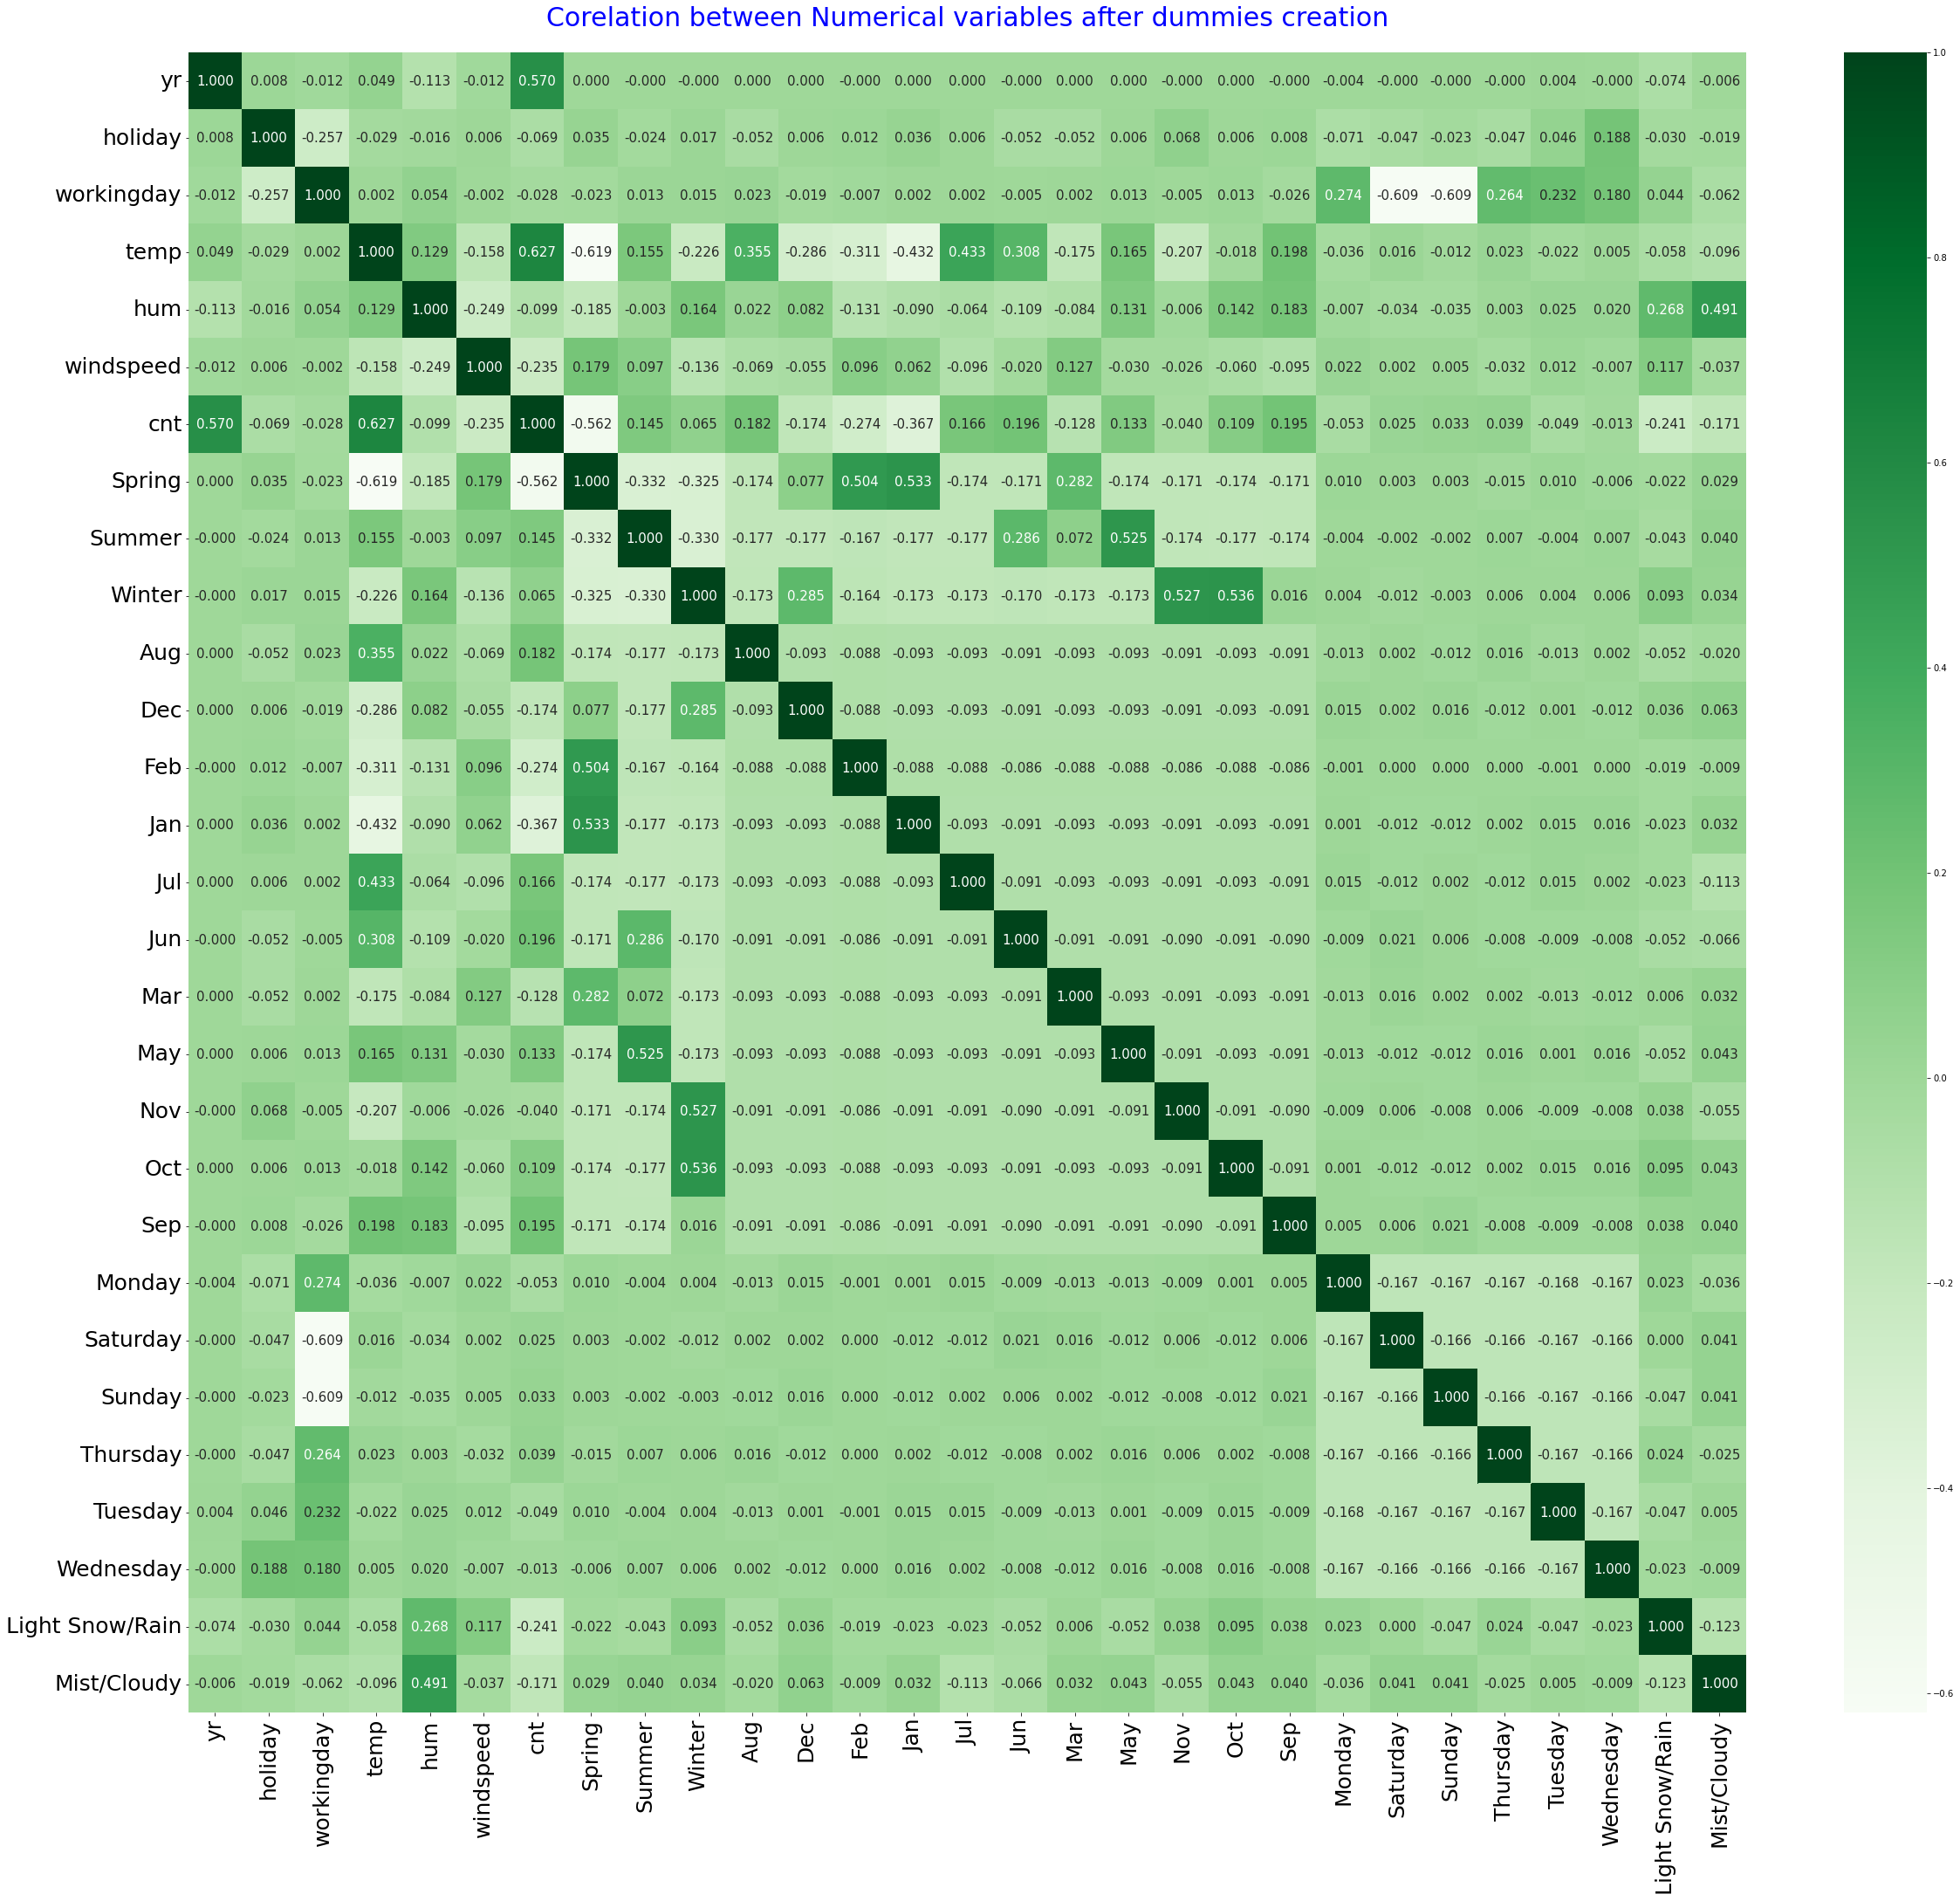

In [276]:
# Co-relation with dummy variables through heat map
plt.figure(figsize=(40, 35))
sns.heatmap(bike_data.corr(), cmap='Greens', annot = True, fmt = '.3f',annot_kws={"fontsize":15})
plt.title('Corelation between Numerical variables after dummies creation', pad = 30, color = 'b', fontsize = 30)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25,rotation=0)
plt.show()

**Observations**
*   Predictor variables like 'temp', 'summer', jun to oct months are in good co-relation with target variable 'cnt'.

# Divide Boombike data into train and test dataset

In [277]:
# Split dataset to train and test

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, random_state = 100)

In [278]:
# train data check

bike_train.shape

(510, 29)

In [279]:
# test data check

bike_test.shape

(220, 29)

# Scaling the variables

In [280]:
# perform scaling to training dataset

num_vars = ['temp', 'hum', 'windspeed']

scaler = MinMaxScaler()

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [281]:
bike_train.shape

(510, 29)

In [282]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist/Cloudy
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [283]:
# Check min and max values (in between 0 to 1)

bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,4485.337255,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,1950.666077,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dividing into X and Y sets for the model building**

In [284]:
# dividing x and y on training data set

y_train = bike_train.pop('cnt')
x_train = bike_train

# Model building for training

**RFE (Reccursive Feature Elimination)**

In [285]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm,n_features_to_select = 15)             # running RFE
rfe = rfe.fit(x_train, y_train)


In [286]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light Snow/Rain', True, 1),
 ('Mist/Cloudy', True, 1)]

In [287]:
# Check the selected variables by RFE

x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow/Rain',
       'Mist/Cloudy'],
      dtype='object')

In [288]:
# Check the variables eliminated by RFE

x_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [289]:
# Creating X_train dataframe with RFE selected variables

x_train_rfe = x_train[x_train.columns[rfe.support_]]

In [290]:
x_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Spring,Summer,Winter,Dec,Jan,Jul,Nov,Sep,Light Snow/Rain,Mist/Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [291]:
x_train_rfe.shape

(510, 15)

# Model 1

In [292]:
# Custom function for LR model building and summary display

def sm_model_build(X_train_dataset):
    
    x_train_rfe_sm = sm.add_constant(X_train_dataset)
    
    lm_smodel = sm.OLS(y_train, x_train_rfe_sm).fit()
    
    return lm_smodel

In [293]:
lrmodel = sm_model_build(x_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          8.15e-189
Time:                        16:10:42   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2800.5481    313.638     

# Manual Check using P-value and VIF

# Model 2

In [294]:
# Calculating VIF

def Calculate_VIF(X_train_dataset):
    VIF = pd.DataFrame()
    VIF['Features'] = X_train_dataset.columns
    VIF['VIF'] = [variance_inflation_factor(X_train_dataset.values, i) for i in range(X_train_dataset.shape[1])]
    VIF = round(VIF, 2)
    VIF.sort_values(by = 'VIF', ascending = False, inplace = True)
    return VIF

In [295]:
VIF_model2 = Calculate_VIF(x_train_rfe)
VIF_model2

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.82
14,Mist/Cloudy,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


In [296]:
# Create a dataframe that will contain the names of all the variables selected from RFE and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.82
14,Mist/Cloudy,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


**Observations**
*   When comparing P-value and VIF in Models 1 and 2, dec has a high P-value. So. We're getting rid of it.

In [297]:
x_train_rfe.drop(['Dec'], axis = 1, inplace = True)

In [298]:
x_train_rfe.shape

(510, 14)

# Model 3

In [299]:
lrmodel = sm_model_build(x_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.41e-189
Time:                        16:11:17   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2657.8086    306.565     

In [300]:
VIF_model3 = Calculate_VIF(x_train_rfe)
VIF_model3

,Features,VIF
3,hum,29.09
2,temp,16.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,3.78
6,Summer,2.80
13,Mist/Cloudy,2.29
0,yr,2.09
8,Jan,1.67
10,Nov,1.60


**Observations:**
*   From Model 3, P-value is high for 'Nov' and hence we are dropping it.

In [301]:
x_train_rfe.drop(['Nov'], axis = 1, inplace = True)

In [302]:
x_train_rfe.shape

(510, 13)

# Model 4

In [303]:
lrmodel = sm_model_build(x_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          7.59e-190
Time:                        16:11:37   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2598.4103    303.711     

In [304]:
VIF_model4 = Calculate_VIF(x_train_rfe)
VIF_model4

,Features,VIF
3,hum,29.02
2,temp,16.71
4,windspeed,4.66
5,Spring,4.34
7,Winter,3.36
6,Summer,2.79
12,Mist/Cloudy,2.29
0,yr,2.09
8,Jan,1.67
9,Jul,1.59


**Observations**

*    From Model 4, there is Higher P-value for 'Jan' and hence we are dropping it.



In [305]:
x_train_rfe.drop(['Jan'], axis = 1, inplace = True)

In [306]:
x_train_rfe.shape

(510, 12)

# Model 5

In [307]:
lrmodel = sm_model_build(x_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.95e-190
Time:                        16:12:01   Log-Likelihood:                -4116.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2497.0845    299.726     

In [308]:
VIF_model5 = Calculate_VIF(x_train_rfe)
VIF_model5

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,Spring,4.01
7,Winter,3.33
6,Summer,2.79
11,Mist/Cloudy,2.28
0,yr,2.08
8,Jul,1.58
9,Sep,1.38


**Observations**
*   From Model 5, there is Higher VIF for 'hum' and hence we are dropping it.




In [309]:
x_train_rfe.drop(['hum'], axis = 1, inplace = True)

In [310]:
x_train_rfe.shape

(510, 11)

# Model 6

In [311]:
lrmodel = sm_model_build(x_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          5.06e-187
Time:                        16:12:19   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1755.4766    256.961     

In [312]:
VIF_model6 = Calculate_VIF(x_train_rfe)
VIF_model6

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,Summer,2.23
4,Spring,2.08
0,yr,2.07
6,Winter,1.78
7,Jul,1.58
10,Mist/Cloudy,1.55
8,Sep,1.34
9,Light Snow/Rain,1.08


**Observations**
*   From Model 6, there is Higher P-value for 'Jul' and hence we are dropping it.




In [313]:
x_train_rfe.drop(['Jul'], axis = 1, inplace = True)

In [314]:
x_train_rfe.shape

(510, 10)

# Model 7

In [315]:
lrmodel = sm_model_build(x_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.47e-186
Time:                        16:12:35   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1680.9085    257.298     

In [316]:
VIF_model7 = Calculate_VIF(x_train_rfe)
VIF_model7

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,Spring,1.99
5,Summer,1.90
6,Winter,1.63
9,Mist/Cloudy,1.55
7,Sep,1.23
8,Light Snow/Rain,1.08
1,holiday,1.04


**Observations**
*   From Model 7, there is Higher P-value for 'Spring' and hence dropping it.




In [317]:
x_train_rfe.drop(['Spring'], axis = 1, inplace = True)

In [318]:
x_train_rfe.shape

(510, 9)

# Model 8 (Final model)

In [319]:
lrmodel = sm_model_build(x_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.83e-186
Time:                        16:13:02   Log-Likelihood:                -4134.5
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     500   BIC:                             8331.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1116.5474    145.789     

In [320]:
VIF_model8 = Calculate_VIF(x_train_rfe)
VIF_model8

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,Summer,1.57
8,Mist/Cloudy,1.48
5,Winter,1.37
6,Sep,1.20
7,Light Snow/Rain,1.08
1,holiday,1.04


**Observations:**

*   Final model has low P-value and VIF, and High F-statistic value.

# Residual analysis

In [321]:
# calculate y_train_pred

x_train_rfe_model = sm.add_constant(x_train_rfe)
print(x_train_rfe_model.head(1))


y_train_pred = lrmodel.predict(x_train_rfe_model)

     const  yr  holiday      temp  windspeed  Summer  Winter  Sep  \
576    1.0   1        0  0.815169   0.264686       0       0    0   

     Light Snow/Rain  Mist/Cloudy  
576                0            0  


In [322]:
y_train_pred.head()

576    6670.885324
426    4226.464043
728    3424.790281
482    4858.554002
111    2340.695746
dtype: float64

In [323]:
res = y_train - y_train_pred
print(res.head())

576     545.114676
426    -160.464043
728   -1628.790281
482    -638.554002
111    -657.695746
dtype: float64


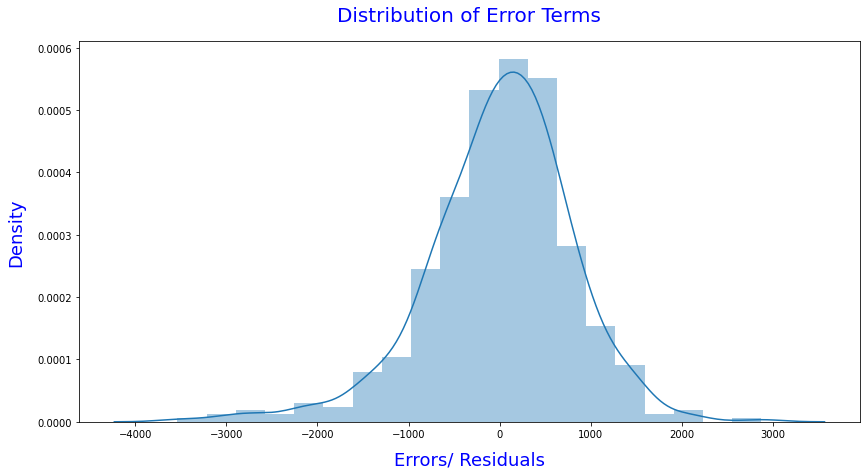

In [324]:
# Normality: Plot the histogram of the error terms

plt.figure(figsize=(14,7))
sns.distplot(res, bins = 20)
plt.title('Distribution of Error Terms', fontsize = 20, color = 'b', pad = 20)      

plt.xlabel('Errors/ Residuals', fontsize = 18, color = 'b', labelpad = 12)

plt.ylabel('Density', fontsize = 18, color = 'b', labelpad = 12) 

plt.show()

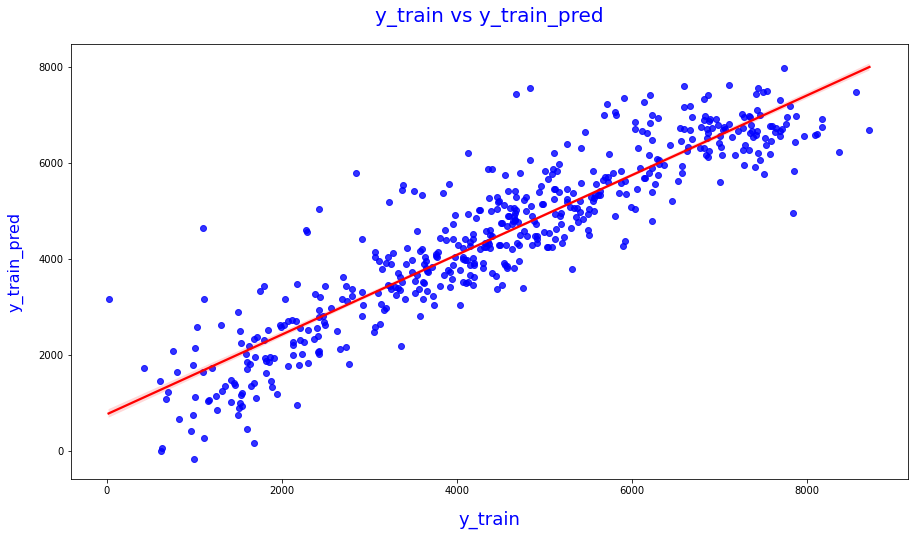

In [325]:
#Homoscedasticity: regression plot


plt.figure(figsize=(15,8))
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_train vs y_train_pred', fontsize=20, color = 'b', pad = 22)  

plt.xlabel('y_train', fontsize=18, color = 'b', labelpad = 15)    

plt.ylabel('y_train_pred', fontsize=16, color = 'b', labelpad = 15)                         

plt.show()

# Prediction and evaluation on test data set

In [326]:
# scaling to test sets

dummy_vars_test = ['temp', 'hum', 'windspeed']

bike_test[dummy_vars_test] = scaler.fit_transform(bike_test[dummy_vars_test])

In [327]:
bike_test.shape

(220, 29)

In [328]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist/Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.508362,0.418803,4560.559091,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.248645,0.200875,0.187683,1904.968544,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.361079,0.284201,3312.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.491299,0.403318,4582.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.650989,0.523975,5913.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dividing into X and Y datasets**

In [329]:
y_test = bike_test.pop('cnt')
x_test = bike_test

In [330]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist/Cloudy
184,0,1,0,0.837241,0.534223,0.149393,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.470417,0.231142,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [331]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [332]:
# Making predictions on X data set

x_test_sm = x_test[x_train_rfe.columns]

x_test_sm.head()

,yr,holiday,temp,windspeed,Summer,Winter,Sep,Light Snow/Rain,Mist/Cloudy
184,0,1,0.837241,0.149393,0,0,0,0,1
535,1,0,0.911423,0.231142,1,0,0,0,0
299,0,0,0.496221,0.443398,0,1,0,0,1
221,0,0,0.890387,0.449707,0,0,0,0,0
152,0,0,0.821739,0.682387,1,0,0,0,0


In [333]:
# adding constant

x_test_smodel = sm.add_constant(x_test_sm)

x_test_smodel.head()

,const,yr,holiday,temp,windspeed,Summer,Winter,Sep,Light Snow/Rain,Mist/Cloudy
184,1.0,0,1,0.837241,0.149393,0,0,0,0,1
535,1.0,1,0,0.911423,0.231142,1,0,0,0,0
299,1.0,0,0,0.496221,0.443398,0,1,0,0,1
221,1.0,0,0,0.890387,0.449707,0,0,0,0,0
152,1.0,0,0,0.821739,0.682387,1,0,0,0,0


In [334]:
# Calculating y test predictor

y_test_pred = lrmodel.predict(x_test_smodel)

y_test_pred.head()

184    3366.562041
535    7939.648254
299    3332.609829
221    4758.693630
152    4887.367797
dtype: float64

# Evaluation

In [335]:
# Finding R2 for test set

r2_score = r2_score(y_true = y_test, y_pred = y_test_pred)

print(r2_score)

0.7774219155438874


In [336]:
# Adjusted r2 calculation

n = x_test_sm.shape[0]
k = x_test_sm.shape[1]

Adjusted_R2 = 1-(((1-r2_score)*(n-1))/(n-k-1))

print(Adjusted_R2)

0.7678828547814825


**Train and test observations**
*   The trained model's R-squared value is 83 percent.
*   The test model's R-squared score is 77.7%.
*   The train's adjusted R-squared score is 82.7 percent.
*   The test's adjusted R-squared value is 76.7 percent.

As a result, both the test and train models R squared and Adjusted R squared are in the 5% area, indicating that the model is good.



# Best model for best fit regression line equation
$cnt=1116.5474 + 4763.2820×temperature+879.5865×Sept+765.5945×summer+1124.2676×winter+2024.0255×year-2458.7004×Light  Snow-681.2314×MistCloudy-857.7734×holiday-1332.0158×windspeed$

# Business Explanation: 

Businesses can concentrate on the **factors** listed below to better understand the characteristics that drive demand for these shared bikes in the American market.
*   BoomBikes, a bike-sharing company based in the United States, can focus more on temperature because **a rise in temperature will increase the demand for bikes**.
- Businesses should concentrate their efforts on the **Summer and Winter seasons**, when demand is highest.
- Demand is also high in September, so businesses can concentrate on this month.
- We can see that demand for bikes was higher in 2019 than in 2018, **as there is an increase in demand in 2019**, although businesses may have revenue dips owing to the ongoing Corona pandemic, and things will improve once the Corona Virus is reduced.
- Similarly, we may notice that **less demand exists in misty and cloudy weather conditions**. Businesses can provide 'offers/discounts' or 'setup bike shields' to increase demand during these weather conditions.
- Now that we have negative coefficients for the **holiday variable**, businesses can offer'special Packages' to enhance demand.